## World Happiness Rank

### Summary

On March 20th in 2017, the UN released the World Happiness Report - a ranking of which countries in the world could be considered as "happy". This report contains 155 countries from each continent to construct an understanding of which countries may be the happiest. This ranking is revered across the globe, as it could be an indication of the country's policy-making decision skills. Experts around the world ( in economy, psychology, and foreign affairs) have noted that these scores may be a good indication of a country's progress.

The UN looked at seven different variables and took a survey of the population in order to construct an overall "happiness score". This score was a measure of data taken by the Gallup World Poll. Questions were answered by asking individuals to rank each question about their life on a scale of 0 to 10, with 10 being living their best possible life, and 0 being living worse than the situation they are in at the moment of the survey. They were asked to rate their current life on that survey as well. Each variable was then normalized and then compared against a Dystopia; a hypothetical country which would have the lowest score in all categories - and a lower score than the lowest ranking country.[1]

#### The required libraries were imported:
1. Pandas - for data manipulation and analysis
2. Numpy - for computation
3. Matplotlib - for plotting
4. Seaborn - for plotting
5. Sklearn - for models
6. Urllib - for data retrieval
7. os - for providing a portable way of using operating system dependent functionality
9. Statesmodel - to estimate statistical models and perform statistical tests

In [457]:
from __future__ import print_function
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics, cross_validation
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import KFold
from sklearn import cluster, mixture # For clustering 
import types
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import os
import urllib.request

#### The data for the years 2015-2017 is retrieved using urllib from S3 buckets  

In [521]:
url = "https://s3-us-west-2.amazonaws.com/bdafinalproject/2017.csv"
url1 = "https://s3-us-west-2.amazonaws.com/bdafinalproject/2016.csv"
url2 = "https://s3-us-west-2.amazonaws.com/bdafinalproject/2015.csv"
urllib.request.urlretrieve(url,'2017.csv')
urllib.request.urlretrieve(url1,'2016.csv')
urllib.request.urlretrieve(url2,'2015.csv')

('2015.csv', <http.client.HTTPMessage at 0x229230c4eb8>)

#### Data for the year 2015, 2016 and 2017 is loaded in the dataframes

In [522]:
data1 = pd.read_csv('2017.csv')
data2 = pd.read_csv('2016.csv')
data3 = pd.read_csv('2015.csv')

#### Data for Analysis based on Regions is loaded in the dataframes

In [523]:
data16 = pd.read_csv('2016.csv')
data15 = pd.read_csv('2015.csv')
data17 = pd.read_csv('2017.csv')

In [524]:
data1.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [525]:
data2.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [526]:
data3.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


## Data Pre-Processing

#### Renaming the columns to mantain the integrity of the dataset for all three years

In [527]:
data1.rename(columns={'Country':'Country', 'Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score',
 'Economy..GDP.per.Capita.':'Economy', 'Family':'Family',
       'Health..Life.Expectancy.':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust..Government.Corruption.':'Trust','Dystopia.Residual':'Dystopia_Residual'},inplace=True)

In [528]:
data2.rename(columns={'Country':'Country', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [529]:
data3.rename(columns={'Country':'Country', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [530]:
data16.rename(columns={'Country':'Country', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [531]:
data15.rename(columns={'Country':'Country', 'Happiness Rank':'Happiness_Rank','Happiness Score':'Happiness_Score',
 'Economy (GDP per Capita)':'Economy', 'Family':'Family',
       'Health (Life Expectancy)':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust (Government Corruption)':'Trust','Dystopia Residual':'Dystopia_Residual'},inplace=True)

In [532]:
data17.rename(columns={'Country':'Country', 'Happiness.Rank':'Happiness_Rank','Happiness.Score':'Happiness_Score',
 'Economy..GDP.per.Capita.':'Economy', 'Family':'Family',
       'Health..Life.Expectancy.':'Health', 'Freedom':'Freedom', 'Generosity':'Generosity',
       'Trust..Government.Corruption.':'Trust','Dystopia.Residual':'Dystopia_Residual'},inplace=True)

#### Adding a column 'Year' for analysis purposes

In [533]:
data1['Year'] = int("2017")

In [534]:
data2['Year'] = int("2016") 

In [535]:
data3["Year"] = int("2015")

In [536]:
data1.head()

,Country,Happiness_Rank,Happiness_Score,Whisker.high,Whisker.low,Economy,Family,Health,Freedom,Generosity,Trust,Dystopia_Residual,Year
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,2017
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,2017
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,2017
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,2017
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,2017


In [537]:
data2.head()

,Country,Region,Happiness_Rank,Happiness_Score,Lower Confidence Interval,Upper Confidence Interval,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939,2016
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463,2016
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137,2016
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465,2016
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596,2016


In [538]:
data3.head()

,Country,Region,Happiness_Rank,Happiness_Score,Standard Error,Economy,Family,Health,Freedom,Trust,Generosity,Dystopia_Residual,Year
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,2015
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,2015
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,2015
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,2015
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,2015


#### Dropping columns that are not present in the data for all three years

In [539]:
data2.drop(columns = {'Region'},axis = 1, inplace = True)

In [540]:
data3.drop(columns = {'Region','Standard Error'},axis = 1, inplace = True)

#### Merging all the data into one Dataframe

In [541]:
frames =[data1,data2,data3]
data = pd.concat(frames)

In [542]:
data.head()

,Country,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,0.315964,NaN,7.594445,7.479556,2017
1,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,NaN,0.400770,NaN,7.581728,7.462272,2017
2,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,NaN,0.153527,NaN,7.622030,7.385970,2017
3,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,NaN,0.367007,NaN,7.561772,7.426227,2017
4,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,NaN,0.382612,NaN,7.527542,7.410458,2017


#### Data description

In [543]:
data.describe()

,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,Year
count,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,157.000000,470.000000,157.000000,155.000000,155.000000,470.000000
mean,2.092717,0.927830,0.990347,0.402828,0.242241,78.829787,5.370728,0.579968,5.282395,0.134790,5.481975,5.452326,5.255713,2015.993617
std,0.565772,0.415584,0.318707,0.150356,0.131543,45.281408,1.136998,0.240161,1.148043,0.111313,1.136493,1.118542,1.145030,0.816907
min,0.328580,0.000000,0.000000,0.000000,0.000000,1.000000,2.693000,0.000000,2.732000,0.000000,3.078000,2.864884,2.521116,2015.000000
25%,1.737975,0.605292,0.793000,0.297615,0.152831,40.000000,4.509000,0.402301,4.327000,0.059777,4.465000,4.608172,4.374955,2015.000000
50%,2.094640,0.995439,1.025665,0.418347,0.223140,79.000000,5.282500,0.630053,5.237000,0.099502,5.419000,5.370032,5.193152,2016.000000
75%,2.455575,1.252443,1.228745,0.516850,0.315824,118.000000,6.233750,0.768298,6.154000,0.173161,6.434000,6.194600,6.006527,2017.000000
max,3.837720,1.870766,1.610574,0.669730,0.838075,158.000000,7.587000,1.025250,7.460000,0.551910,7.669000,7.622030,7.479556,2017.000000


#### .describe() helps summarizing the entire dataset

In [544]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 470 entries, 0 to 157
Data columns (total 15 columns):
Country                      470 non-null object
Dystopia_Residual            470 non-null float64
Economy                      470 non-null float64
Family                       470 non-null float64
Freedom                      470 non-null float64
Generosity                   470 non-null float64
Happiness_Rank               470 non-null int64
Happiness_Score              470 non-null float64
Health                       470 non-null float64
Lower Confidence Interval    157 non-null float64
Trust                        470 non-null float64
Upper Confidence Interval    157 non-null float64
Whisker.high                 155 non-null float64
Whisker.low                  155 non-null float64
Year                         470 non-null int64
dtypes: float64(12), int64(2), object(1)
memory usage: 58.8+ KB


In [545]:
data.head()

,Country,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Lower Confidence Interval,Trust,Upper Confidence Interval,Whisker.high,Whisker.low,Year
0,Norway,2.277027,1.616463,1.533524,0.635423,0.362012,1,7.537,0.796667,NaN,0.315964,NaN,7.594445,7.479556,2017
1,Denmark,2.313707,1.482383,1.551122,0.626007,0.355280,2,7.522,0.792566,NaN,0.400770,NaN,7.581728,7.462272,2017
2,Iceland,2.322715,1.480633,1.610574,0.627163,0.475540,3,7.504,0.833552,NaN,0.153527,NaN,7.622030,7.385970,2017
3,Switzerland,2.276716,1.564980,1.516912,0.620071,0.290549,4,7.494,0.858131,NaN,0.367007,NaN,7.561772,7.426227,2017
4,Finland,2.430182,1.443572,1.540247,0.617951,0.245483,5,7.469,0.809158,NaN,0.382612,NaN,7.527542,7.410458,2017


#### Checking for missing values

In [546]:
data.isnull().sum()

Country                        0
Dystopia_Residual              0
Economy                        0
Family                         0
Freedom                        0
Generosity                     0
Happiness_Rank                 0
Happiness_Score                0
Health                         0
Lower Confidence Interval    313
Trust                          0
Upper Confidence Interval    313
Whisker.high                 315
Whisker.low                  315
Year                           0
dtype: int64

In [547]:
data.shape

(470, 15)

#### Dropping columns that have excessive missing values

In [548]:
data.drop(columns = 'Whisker.low',axis = 1, inplace = True)
data.drop(columns = 'Whisker.high',axis = 1, inplace = True)
data.drop(columns = 'Lower Confidence Interval',axis = 1, inplace = True)
data.drop(columns = 'Upper Confidence Interval',axis = 1, inplace = True)

In [549]:
data.apply(lambda x: sum(x.isnull()),axis=0)

Country              0
Dystopia_Residual    0
Economy              0
Family               0
Freedom              0
Generosity           0
Happiness_Rank       0
Happiness_Score      0
Health               0
Trust                0
Year                 0
dtype: int64

#### The data is now clean

In [550]:
data.columns

Index(['Country', 'Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness_Rank', 'Happiness_Score', 'Health', 'Trust',
       'Year'],
      dtype='object')

## Exploratory Data Analysis

In [551]:
data_rank = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness_Rank'], 
           text = data['Country'],
          colorscale = 'Viridis', reversescale = False)
layout = dict(title = 'Happiness Rank Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap_rank = go.Figure(data = [data_rank], layout=layout)
iplot(choromap_rank)

#### The above graph shows that the countries with deep blue shade are ranked the most happy and the countries with yellow color are ranked the least happy among the 155 countries

In [552]:
data_score = dict(type = 'choropleth', 
           locations = data['Country'],
           locationmode = 'country names',
           z = data['Happiness_Score'], 
           text = data['Country'],
           colorbar = {'title':'Happiness'})
layout = dict(title = 'Happiness Score Across the World', 
             geo = dict(showframe = False, 
                       projection = {'type': 'Mercator'}))
choromap_score = go.Figure(data = [data_score], layout=layout)
iplot(choromap_score)

#### This graphs shows us the countries rank by score :  the countries that are a darker red have a higher score. The countries with a lighter shade have a lower score.


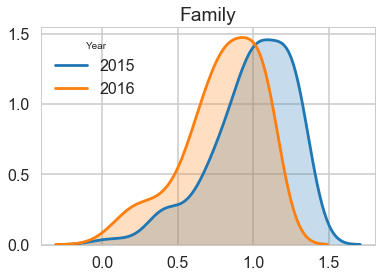

In [553]:
for frame in [data15,data16]:
    plot_family=sns.kdeplot(frame['Family'], shade=True)

plot_family.legend_.set_title("Year")
plot_family.set_title("Family")
# we will replace labels
new_labels = ['2015','2016']

for current_label_obj, label in zip(plot_family.legend_.texts, new_labels): 
    current_label_obj.set_text(label)

#### We can see that the family factor has decreased in 2016

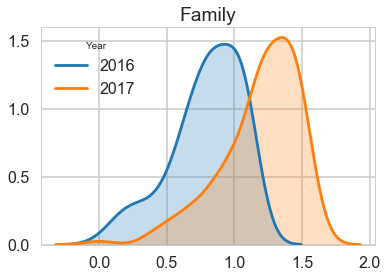

In [554]:
for frame in [data16,data17]:
    plot_family=sns.kdeplot(frame['Family'], shade=True)

plot_family.legend_.set_title("Year")
plot_family.set_title("Family")
# we will replace labels
new_labels = ['2016','2017']

for current_label_obj, label in zip(plot_family.legend_.texts, new_labels): 
    current_label_obj.set_text(label)

In [555]:
data15.columns

Index(['Country', 'Region', 'Happiness_Rank', 'Happiness_Score',
       'Standard Error', 'Economy', 'Family', 'Health', 'Freedom', 'Trust',
       'Generosity', 'Dystopia_Residual'],
      dtype='object')

#### We can see that the family factor has increased since 2016

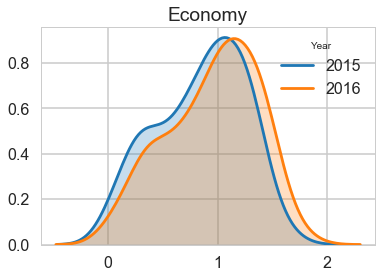

In [556]:
for frame in [data15,data16]:
    plot_family=sns.kdeplot(frame['Economy'], shade=True)

plot_family.legend_.set_title("Year")
plot_family.set_title("Economy")
# we will replace labels
new_labels = ['2015','2016']

for current_label_obj, label in zip(plot_family.legend_.texts, new_labels): 
    current_label_obj.set_text(label)

#### The economy factor increased from 2015 to 2016

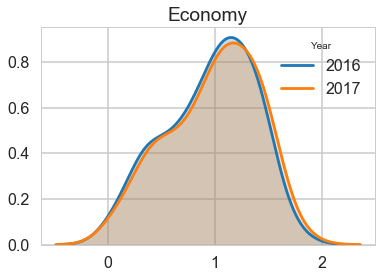

In [557]:
for frame in [data16,data17]:
    plot_family=sns.kdeplot(frame['Economy'], shade=True)

plot_family.legend_.set_title("Year")
plot_family.set_title("Economy")
# we will replace labels
new_labels = ['2016','2017']
 
for current_label_obj, label in zip(plot_family.legend_.texts, new_labels): 
    current_label_obj.set_text(label)

#### We can see that the economy hasn't changed much from 2016 to 2017

### Findng correlation between the various features of the dataset 

In [558]:
corr=data.corr()
corr

,Dystopia_Residual,Economy,Family,Freedom,Generosity,Happiness_Rank,Happiness_Score,Health,Trust,Year
Dystopia_Residual,1.000000,0.030087,-0.081537,0.038422,-0.114468,-0.482706,0.489747,0.057674,0.000001,-0.177951
Economy,0.030087,1.000000,0.585449,0.344962,-0.014173,-0.790551,0.785450,0.792224,0.301935,0.136445
Family,-0.081537,0.585449,1.000000,0.425377,0.071775,-0.637627,0.636532,0.486383,0.158605,0.251134
Freedom,0.038422,0.344962,0.425377,1.000000,0.343389,-0.547627,0.560353,0.359566,0.490405,-0.054697
Generosity,-0.114468,-0.014173,0.071775,0.343389,1.000000,-0.146162,0.163562,0.077326,0.287414,0.029782
Happiness_Rank,-0.482706,-0.790551,-0.637627,-0.547627,-0.146162,1.000000,-0.993268,-0.750146,-0.384371,-0.013460
Happiness_Score,0.489747,0.785450,0.636532,0.560353,0.163562,-0.993268,1.000000,0.748040,0.406340,-0.007761
Health,0.057674,0.792224,0.486383,0.359566,0.077326,-0.750146,0.748040,1.000000,0.262932,-0.134582
Trust,0.000001,0.301935,0.158605,0.490405,0.287414,-0.384371,0.406340,0.262932,1.000000,-0.074393
Year,-0.177951,0.136445,0.251134,-0.054697,0.029782,-0.013460,-0.007761,-0.134582,-0.074393,1.000000


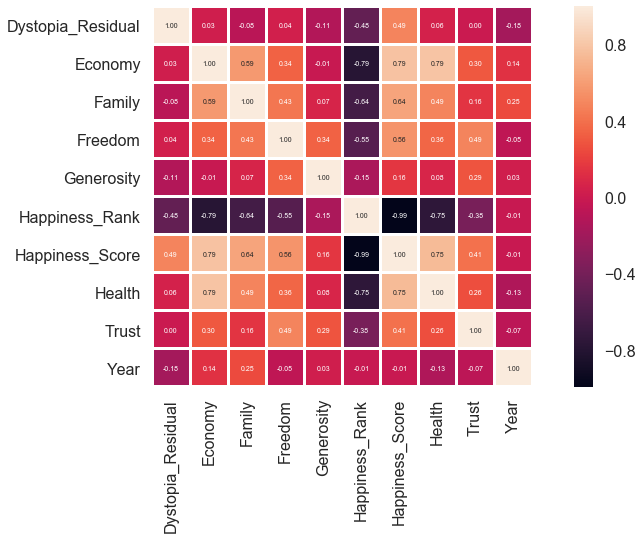

In [559]:
plt.figure(figsize=(15,7))
sns.heatmap(corr, cbar = True, square = True, annot=True, linewidths = 2, fmt='.2f',annot_kws={'size':7}) 
#sns.plt.title('Heatmap of Correlation Matrix')
plt.show()

#### Verifying the assumptions 

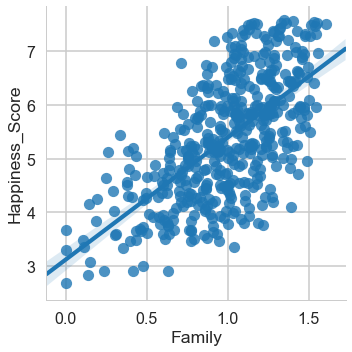

In [560]:
sns.lmplot(y="Happiness_Score", x="Family", data=data)
#3sns.plt.show()

#### As family is the dependant variable, family is correlated to Happiness Score and not violating the assumptions

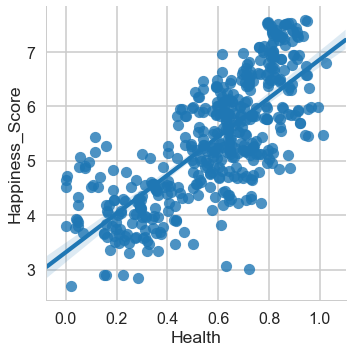

In [561]:
sns.lmplot(y="Happiness_Score", x="Health", data=data)
#sns.plt.show()

####  Health Life Expectancy is correlated to Happiness Score and not violating the assumptions as it is an independent variable

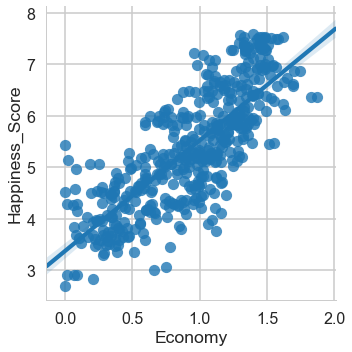

In [562]:
sns.lmplot(y="Happiness_Score", x="Economy", data=data)
#sns.plt.show()

#### As Economy  is the independant variable, Economy  is correlated to Happiness Score and not violating the assumptions

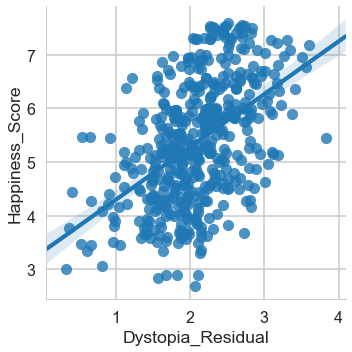

In [563]:
sns.lmplot(y="Happiness_Score", x="Dystopia_Residual", data=data)

#### As Dystopia Residual is the independant variable, Dystopia Residual is correlated to Happiness Score and not violating the assumptions

### Checking if predictor variables are correlated

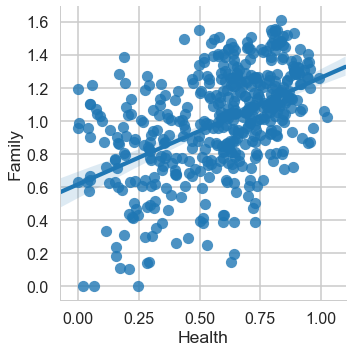

In [564]:
sns.lmplot(y="Family", x="Health", data=data)
#sns.plt.show()

#### Family and Health Life Expectancy are correlated  to each other. So we can take either Family or Health Life Expectancy

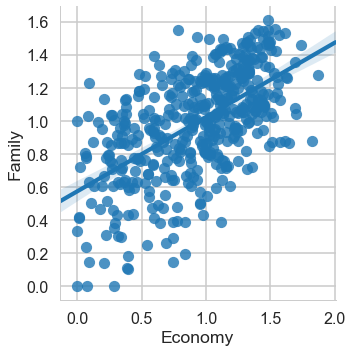

In [565]:
sns.lmplot(y="Family", x="Economy", data=data)
#sns.plt.show()

#### Family and Economy correlated to each other. So we can take either Family or Economy

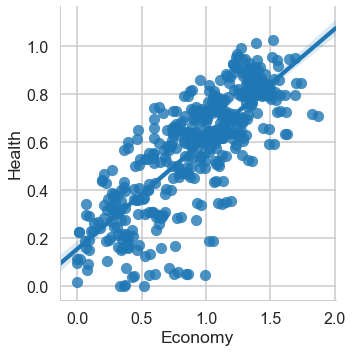

In [566]:
sns.lmplot(y="Health", x="Economy", data=data)
#sns.plt.show()

#### Health and Economy are correlated to each other. So we can take either Health or Economy

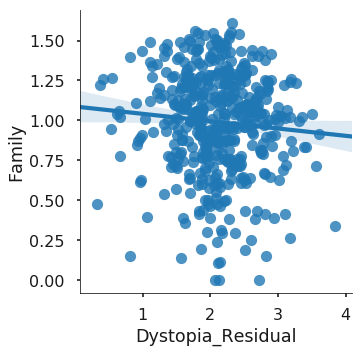

In [492]:
sns.lmplot(y="Family", x="Dystopia_Residual", data=data)

#### Family and Dystopia Residual are not correlated to each other. So we can take both Family and Dystopia Residual.

## Feature Selection

### Selecting the Independent and Dependant features

In [571]:
data.columns

Index(['Country', 'Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness_Rank', 'Happiness_Score', 'Health', 'Trust',
       'Year'],
      dtype='object')

In [577]:
X = data[[ 'Dystopia_Residual', 'Economy', 'Family', 'Freedom',
       'Generosity', 'Happiness_Rank', 'Health', 'Trust',
       'Year']]
y = data['Happiness_Score']

In [578]:
import statsmodels.api as sm

def stepwise_selection(X1, y1,
                      initial_list=[],
                      threshold_in=0.01,
                      threshold_out = 0.05,
                      verbose=True):
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X1.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.argmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

       # backward step
        model = sm.OLS(y1, sm.add_constant(pd.DataFrame(X1[included]))).fit()
       # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

result = stepwise_selection(X, y)

print('resulting features:')
print(result)

C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: FutureWarning:

'argmin' is deprecated. Use 'idxmin' instead. The behavior of 'argmin' will be corrected to return the positional minimum in the future. Use 'series.values.argmin' to get the position of the minimum now.



Add  Happiness_Rank                 with p-value 0.0
Add  Trust                          with p-value 4.98738e-07
Add  Year                           with p-value 0.000267933
Add  Dystopia_Residual              with p-value 0.00549651
Add  Family                         with p-value 2.54709e-08
Add  Economy                        with p-value 3.66289e-13
Add  Generosity                     with p-value 3.27681e-30
Add  Health                         with p-value 5.06438e-36
Add  Freedom                        with p-value 0.0


C:\Users\mehta\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: FutureWarning:

'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.



Drop Year                           with p-value 0.606171
Drop Happiness_Rank                 with p-value 0.291477
resulting features:
['Trust', 'Dystopia_Residual', 'Family', 'Economy', 'Generosity', 'Health', 'Freedom']


In [579]:
# Features selected using Stepwise Selection

X_stepwise = data[['Trust', 'Dystopia_Residual', 'Family', 'Economy', 'Generosity', 'Health', 'Freedom']]

### Recursive Feature Elimination

It is used to select no of features by considering smaller sets of features again and again. First, the features are selected on the initial set based on the importance using feature_importances_. Then the least important features are pruned recursively until the no. of features selected by the user is achieved.

In [580]:
#RFE

from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

model = LinearRegression()
# create the RFE model and select 3 attributes
rfe = RFE(model)
rfe = rfe.fit(X, y)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True  True False  True False False]
[2 1 3 1 1 6 1 4 5]


#### Eliminating features that have a rank greater than 3

In [581]:
X_rfe = data[['Dystopia_Residual', 'Economy', 'Family', 'Freedom','Generosity', 'Health']]

### Boruta

It can be used to obtain all the relevant features. It captures all the important independent variable with respect to output variables.This means it tries to find all features carrying information usable for prediction, rather than finding a possibly compact subset of features on which some classifier has a minimal error.[2]

Where rfc = RandomForestClassifier                                                                                               
n_estimators = number of times it will evaluate      
Verbose = to control verbosity of the output

In [582]:
# BORUTA
import statsmodels.api as sm
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from boruta import BorutaPy

# load X and y
# NOTE BorutaPy accepts numpy arrays only, hence the .values attribute
X = X.values
y = y.values

# define random forest classifier, with utilising all cores and
# sampling in proportion to y labels
rf = RandomForestRegressor(n_estimators=100 , max_depth=5)

# define Boruta feature selection method
feat_selector = BorutaPy(rf, n_estimators='auto', verbose=2)

# find all relevant features
feat_selector.fit(X, y)

# check selected features
feat_selector.support_

# check ranking of features
feat_selector.ranking_

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	9
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	9 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	10 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	11 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	12 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	13 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	14 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	15 / 100
Confirmed: 	2
Tentative: 	6
Rejected: 	1


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	16 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	17 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	18 / 100
Confirmed: 	2
Tentative: 	5
Rejected: 	2


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	19 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	20 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	21 / 100
Confirmed: 	2
Tentative: 	4
Rejected: 	3


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	22 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	23 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	24 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	25 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	26 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	27 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	28 / 100
Confirmed: 	2
Tentative: 	3
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	29 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	30 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	31 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	32 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	33 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	34 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	35 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	36 / 100
Confirmed: 	3
Tentative: 	2
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	37 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	38 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	39 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	40 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	41 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	42 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	43 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	44 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	45 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	46 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	47 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	48 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	49 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	50 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	51 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	52 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	53 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	54 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	55 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	56 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	57 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	58 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	59 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	60 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	61 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	62 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	63 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	64 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	65 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	66 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	67 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	68 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	69 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	70 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	71 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	72 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	73 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	74 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	75 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	76 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	77 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	78 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	79 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	80 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	81 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	82 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	83 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	84 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	85 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	86 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	87 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	88 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	89 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	90 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	91 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	92 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	93 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	94 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	95 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	96 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	97 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	98 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


C:\Users\mehta\Anaconda3\lib\site-packages\boruta\boruta_py.py:418: RuntimeWarning:

invalid value encountered in greater



Iteration: 	99 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


BorutaPy finished running.

Iteration: 	100 / 100
Confirmed: 	4
Tentative: 	1
Rejected: 	4


array([3, 1, 3, 1, 5, 1, 2, 3, 1])

In [583]:
X_Boruta = data[['Dystopia_Residual', 'Economy', 'Family', 'Freedom', 'Happiness_Rank', 'Health', 'Trust','Year']]

### TPOT

It is used to automate the machine learning pipeline which includes steps from feature engineering to giving best algorithm to perform model validation to improve accuracy scores of the models[3].

In [584]:
# TPOT

from sklearn.cross_validation import train_test_split  
from tpot import TPOTRegressor  
X = X 
y = y  
X_train, X_test, y_train, y_test = train_test_split(X, y,  
                                                   train_size=0.75,  
                                                   test_size=0.25)  
my_tpot = TPOTRegressor(generations=5, population_size = 20 , verbosity= 2)
my_tpot.fit(X_train, y_train)  

Generation 1 - Current best internal CV score: -8.621556302616544e-08


Generation 2 - Current best internal CV score: -8.590331005730305e-08


Generation 3 - Current best internal CV score: -8.590331005730305e-08


Generation 4 - Current best internal CV score: -8.590331005730305e-08


Generation 5 - Current best internal CV score: -8.590331005730305e-08



Best pipeline: LassoLarsCV(MaxAbsScaler(input_matrix), normalize=False)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=5, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
       offspring_size=20, periodic_checkpoint_folder=None,
       population_size=20, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

## Regression models

These are the various error metrics used to evaluate how good a model is for the dataset:

1.R-squared : It is a statistical measure of how close the data are to the fitted regression line [5]. The higher the value, the better the model fits the dataset.

2.Root Mean Square Error(RMSE) : It is a frequently used measure of the differences between values (sample and population values) predicted by a model or an estimator and the values actually observed[6]. The lower the value, the better the model fits the dataset.

3.Mean Absolute Percentage Error(MAPE) : It is a measure of prediction accuracy of a forecasting method in statistics, for example in trend estimation[7]


In [635]:
# importing all important libraries and  functions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm

### Linear Regression

In [637]:
def linear(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    lm = LinearRegression()
    lm.fit(X_train,y_train)
    y = list(y)
    prediction = lm.predict(X_train)
    r2_train = r2_score(y_train, prediction)
    mse = mean_squared_error(y_train, prediction)
    mae_train = mean_absolute_error(y_train, prediction)
    rmse_train = np.sqrt(mse)
    mape_train = np.mean ((np.abs((y_train - prediction) / y_train)) * 100)
    print("TRAIN: Linear Regression")
    print(" ")
    print("mean absolute error = " , mae_train)
    print("Root Mean Square Error= " , rmse_train)
    print("Root Sqaure = " , r2_train)
    print("Mape = " , mape_train)
    accuracy_train = lm.score(X_train, y_train)
    print(accuracy_train)
    model = sm.OLS(y_train,prediction)
    results = model.fit()
    results.summary()
    print('Accuracy training : {:.3f}'.format(lm.score(X_train, y_train)))
    print(" ")

    prediction = lm.predict(X_test)
    r2_test = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae_test = mean_absolute_error(y_test, prediction)
    rmse_test = np.sqrt(mse)
    mape_test = np.mean ((np.abs((y_test - prediction) / y_test)) * 100)
    print('TEST: Linear Regression')
    print(" ")
    print("mean absolute error = " , mae_test)
    print("Root Mean Square Error= " , rmse_test)
    print("Root Sqaure = " ,  r2_test)
    print("Mape = " , mape_test)
    accuracy_test = lm.score(X_test, y_test)
    print(accuracy_test)
    model = sm.OLS(y_test,prediction)
    results = model.fit()
    results.summary()
    print('Accuracy testing : {:.3f}'.format(lm.score(X_test, y_test)))
    print(" ")
    
    linear_regression = accuracy_test ,rmse_test ,r2_test, accuracy_train ,rmse_train,r2_train 
    linear_regression = list(linear_regression)
    metrics = pd.DataFrame(linear_regression,index =['accuracy_test' ,'rmse_test','r2_test','accuracy_train' ,'rmse_train','r2_train'],columns=['LinearRegression'])
    
    
    return metrics #returns summary metrics for linear regression

### Random Forest Regression

In [638]:
def random_forest(X,y):
    from sklearn.ensemble import RandomForestRegressor
    rf = RandomForestRegressor(n_estimators = 100, random_state = np.random)
    #rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=123456)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
    rf.fit(X_train, y_train)
    
    prediction = rf.predict(X_train)
    r2_train = r2_score(y_train, prediction)
    mse = mean_squared_error(y_train, prediction)
    mae_train = mean_absolute_error(y_train, prediction)
    rmse_train = np.sqrt(mse)
    mape_train = np.mean ((np.abs((y_train - prediction) / y_train)) * 100)
    print("TRAIN: Random Forest")
    print(" ")
    print("mean absolute error = " , mae_train)
    print("Root Mean Square Error= " , rmse_train)
    print("Root Sqaure = " , r2_train)
    print("Mape = " , mape_train)
    accuracy_train = rf.score(X_train, y_train)
    print(accuracy_train)
    model = sm.OLS(y_train,prediction)
    results = model.fit()
    results.summary()
    print('Accuracy training : {:.3f}'.format(rf.score(X_train, y_train)))
    print(" ")

    prediction = rf.predict(X_test)
    r2_test = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae_test = mean_absolute_error(y_test, prediction)
    rmse_test = np.sqrt(mse)
    mape_test = np.mean ((np.abs((y_test - prediction) / y_test)) * 100)
    print('TEST: Random Forest')
    print(" ")
    print("mean absolute error = " , mae_test)
    print("Root Mean Square Error= " , rmse_test)
    print("Root Sqaure = " ,  r2_test)
    print("Mape = " , mape_test)
    accuracy_test = rf.score(X_test, y_test)
    print(accuracy_test)
    model = sm.OLS(y_test,prediction)
    results = model.fit()
    results.summary()
    print('Accuracy testing : {:.3f}'.format(rf.score(X_test, y_test)))
    print(" ")
    
    Random_forest = accuracy_test ,rmse_test ,r2_test, accuracy_train ,rmse_train,r2_train
    Random_forest = list(Random_forest)
    metrics1 = pd.DataFrame(Random_forest,index =['accuracy_test' ,'rmse_test' ,'r2_test','accuracy_train' ,'rmse_train' ,'r2_train'],columns=['RandomForestRegressor'])

    return metrics1  #returns summary metrics for random forest regressor

### Extra Tree Regression

In [639]:
# EXTRA TREE REGRESSOR
def extra_tree(X,y):
    from sklearn.ensemble import ExtraTreesRegressor

    extr = ExtraTreesRegressor(n_estimators = 50, random_state = 123)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

    extr.fit(X_train, y_train)
    
    prediction = extr.predict(X_train)
    r2_train = r2_score(y_train, prediction)
    mse = mean_squared_error(y_train, prediction)
    mae_train = mean_absolute_error(y_train, prediction)
    rmse_train = np.sqrt(mse)
    mape_train = np.mean ((np.abs((y_train - prediction) / y_train)) * 100)
    print("TRAIN: Extra Tree Regressor")
    print(" ")
    print("mean absolute error = " , mae_train)
    print("Root Mean Square Error= " , rmse_train)
    print("Root Sqaure = " , r2_train)
    print("Mape = " , mape_train)
    accuracy_train = extr.score(X_train, y_train)
    print(accuracy_train)
    model = sm.OLS(y_train,prediction)
    results = model.fit()
    results.summary()
    print('Accuracy training : {:.3f}'.format(extr.score(X_train, y_train)))
    print(" ")

    prediction = extr.predict(X_test)
    r2_test = r2_score(y_test, prediction)
    mse = mean_squared_error(y_test, prediction)
    mae_test = mean_absolute_error(y_test, prediction)
    rmse_test = np.sqrt(mse)
    mape_test = np.mean ((np.abs((y_test - prediction) / y_test)) * 100)
    print('TEST: Extra Tree Regressor')
    print(" ")
    print("mean absolute error = " , mae_test)
    print("Root Mean Square Error= " , rmse_test)
    print("Root Sqaure = " ,  r2_test)
    print("Mape = " , mape_test)
    accuracy_test = extr.score(X_test, y_test)
    print(accuracy_test)
    model = sm.OLS(y_test,prediction)
    results = model.fit()
    results.summary()
    print('Accuracy testing : {:.3f}'.format(extr.score(X_test, y_test)))
    print(" ")
    
    Extra_Tree = accuracy_test ,rmse_test ,r2_test, accuracy_train ,rmse_train,r2_train
    Extra_Tree = list(Extra_Tree)
    metrics2 = pd.DataFrame(Extra_Tree,index =['accuracy_test' ,'rmse_test' ,'r2_test','accuracy_train' ,'rmse_train','r2_train'],columns=['ExtraTreeRegressor'])
    
    return metrics2 #returns summary metrics for extra tree regressor

### Combining summary metrics for all the models into one Dataframe

In [621]:
def metrics(X,y):
    metrics_data = pd.DataFrame()
    metrics_data = linear(X,y).merge(random_forest(X,y), left_index=True, right_index=True, how='inner')
    metrics_data = metrics_data.merge(extra_tree(X,y), left_index=True, right_index=True, how='inner')
    metrics_data
    print("SUMMARY METRICS") 
    return metrics_data

In [620]:
# Using all the features
metrics(X,y)

TRAIN: Linear Regression
 
mean absolute error =  0.00024162511306329105
Root Mean Square Error=  0.00028048407480818326
Root Sqaure =  0.9999999374887778
Mape =  0.004735513266185673
0.9999999374887778
Accuracy training : 1.000
 
TEST: Linear Regression
 
mean absolute error =  0.00026047753762482655
Root Mean Square Error=  0.00030812828246065704
Root Sqaure =  0.9999999325410636
Mape =  0.005083008741481732
0.9999999325410636
Accuracy testing : 1.000
 
TRAIN: Random Forest
 
mean absolute error =  0.017410372928344707
Root Mean Square Error=  0.024674392981174048
Root Sqaure =  0.9995162349058331
Mape =  0.3640044529688077
0.9995162349058331
Accuracy training : 1.000
 
TEST: Random Forest
 
mean absolute error =  0.060356808870382174
Root Mean Square Error=  0.10184240698254535
Root Sqaure =  0.9926305738113571
Mape =  1.4288919377664364
0.992630573811357
Accuracy testing : 0.993
 
TRAIN: Extra Tree Regressor
 
mean absolute error =  7.43225792966333e-10
Root Mean Square Error=  3.7

,LinearRegression,RandomForestRegressor,ExtraTreeRegressor
accuracy_test,1.000000,0.992631,9.953522e-01
rmse_test,0.000308,0.101842,8.087853e-02
r2_test,1.000000,0.992631,9.953522e-01
accuracy_train,1.000000,0.999516,1.000000e+00
rmse_train,0.000280,0.024674,3.742868e-09
r2_train,1.000000,0.999516,1.000000e+00


In [643]:
# Using features selected by Stepwise Selection
metrics(X_stepwise,y)

TRAIN: Linear Regression
 
mean absolute error =  0.00024189053499949734
Root Mean Square Error=  0.000281912088651461
Root Sqaure =  0.9999999368506373
Mape =  0.004757870711504258
0.9999999368506373
Accuracy training : 1.000
 
TEST: Linear Regression
 
mean absolute error =  0.00025118890984740695
Root Mean Square Error=  0.00030227819234054075
Root Sqaure =  0.9999999350782831
Mape =  0.004848931540753723
0.9999999350782832
Accuracy testing : 1.000
 
TRAIN: Random Forest
 
mean absolute error =  0.07614531793356721
Root Mean Square Error=  0.09934303928102509
Root Sqaure =  0.9921581874027615
Mape =  1.5446184606940725
0.9921581874027615
Accuracy training : 0.992
 
TEST: Random Forest
 
mean absolute error =  0.2089457404725569
Root Mean Square Error=  0.2918958795517004
Root Sqaure =  0.9394614113137633
Mape =  4.60216881904993
0.9394614113137633
Accuracy testing : 0.939
 
TRAIN: Extra Tree Regressor
 
mean absolute error =  5.922950321691129e-10
Root Mean Square Error=  3.43896065

,LinearRegression,RandomForestRegressor,ExtraTreeRegressor
accuracy_test,1.000000,0.939461,9.402521e-01
rmse_test,0.000302,0.291896,2.899834e-01
r2_test,1.000000,0.939461,9.402521e-01
accuracy_train,1.000000,0.992158,1.000000e+00
rmse_train,0.000282,0.099343,3.438961e-09
r2_train,1.000000,0.992158,1.000000e+00


In [645]:
# Using features that were selected by Recursive Feature Selection
metrics(X_rfe,y)

TRAIN: Linear Regression
 
mean absolute error =  0.07279339824364835
Root Mean Square Error=  0.09188448135897445
Root Sqaure =  0.9932914924819646
Mape =  1.3922510146781553
0.9932914924819646
Accuracy training : 0.993
 
TEST: Linear Regression
 
mean absolute error =  0.07719026128024
Root Mean Square Error=  0.09591632637865506
Root Sqaure =  0.9934632566025288
Mape =  1.4077036172123587
0.9934632566025287
Accuracy testing : 0.993
 
TRAIN: Random Forest
 
mean absolute error =  0.0718950258943263
Root Mean Square Error=  0.0956657794418014
Root Sqaure =  0.9927279843845209
Mape =  1.4515404707359787
0.9927279843845208
Accuracy training : 0.993
 
TEST: Random Forest
 
mean absolute error =  0.2006536152293425
Root Mean Square Error=  0.28866571113202016
Root Sqaure =  0.9407938579663853
Mape =  4.427937184981173
0.9407938579663853
Accuracy testing : 0.941
 
TRAIN: Extra Tree Regressor
 
mean absolute error =  4.888788948133356e-10
Root Mean Square Error=  2.843517415620575e-09
Root 

,LinearRegression,RandomForestRegressor,ExtraTreeRegressor
accuracy_test,0.993463,0.940794,9.522228e-01
rmse_test,0.095916,0.288666,2.593118e-01
r2_test,0.993463,0.940794,9.522228e-01
accuracy_train,0.993291,0.992728,1.000000e+00
rmse_train,0.091884,0.095666,2.843517e-09
r2_train,0.993291,0.992728,1.000000e+00


In [646]:
#Using features that were selected using Boruta 
metrics(X_Boruta,y)

TRAIN: Linear Regression
 
mean absolute error =  0.06976425439959369
Root Mean Square Error=  0.08923167509690917
Root Sqaure =  0.9936732646827359
Mape =  1.3486108843315205
0.9936732646827359
Accuracy training : 0.994
 
TEST: Linear Regression
 
mean absolute error =  0.07642516062040555
Root Mean Square Error=  0.10038376441389085
Root Sqaure =  0.9928401599743013
Mape =  1.544662332241147
0.9928401599743013
Accuracy testing : 0.993
 
TRAIN: Random Forest
 
mean absolute error =  0.016725479441365192
Root Mean Square Error=  0.02338876740742456
Root Sqaure =  0.9995653334258654
Mape =  0.3493973770031325
0.9995653334258654
Accuracy training : 1.000
 
TEST: Random Forest
 
mean absolute error =  0.05793850682938709
Root Mean Square Error=  0.09544908111743831
Root Sqaure =  0.99352678745799
Mape =  1.3667167995630178
0.9935267874579898
Accuracy testing : 0.994
 
TRAIN: Extra Tree Regressor
 
mean absolute error =  7.643621988306453e-10
Root Mean Square Error=  3.999734162900449e-09


,LinearRegression,RandomForestRegressor,ExtraTreeRegressor
accuracy_test,0.992840,0.993527,9.945082e-01
rmse_test,0.100384,0.095449,8.791656e-02
r2_test,0.992840,0.993527,9.945082e-01
accuracy_train,0.993673,0.999565,1.000000e+00
rmse_train,0.089232,0.023389,3.999734e-09
r2_train,0.993673,0.999565,1.000000e+00


#### After comparing all the summary metrics for all the models the best result was given by Linear Regression when all the features were taken into consideration giving an accuracy of 100% 

## Regularization

Regularization adds a penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model will be less likely to fit the noise of the training data and will improve the generalization abilities of the model[4]. 

### L2
The L2 regularization is equal to the sum of the squared value of the coefficients.

In [628]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)

ridgeReg.score(X_test,y_test)


0.9986683424802716

Text(0.5,1,'Ridge Regression')

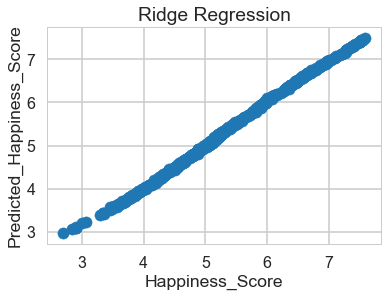

In [629]:
y_predr = ridgeReg.predict(X)

plt.scatter(y, y_predr)
plt.xlabel("Happiness_Score")
plt.ylabel("Predicted_Happiness_Score")
plt.title("Ridge Regression")

### L1
The L1 regularization is equal to the sum of the absolute value of the coefficients. 

In [630]:
from sklearn.linear_model import Lasso

lassoReg = Lasso(alpha=0.03, normalize=True)

lassoReg.fit(X_train,y_train)

pred = lassoReg.predict(X_test)

lassoReg.score(X_test,y_test)

0.7394661203122914

### Elastic Net
It is the mixture of L1 and L2 regularization. It is the sum of absolute and squared value of the coefficients.

In [631]:
from sklearn.linear_model import ElasticNet

ENreg = ElasticNet(alpha=1, l1_ratio=0.5, normalize=False)

ENreg.fit(X_train,y_train)

pred_cv = ENreg.predict(X_test)

ENreg.score(X_test,y_test)

0.9876227109685968

#### The best result we achieved was from ridge regularization with accuracy of 99.7%

## Cross Validation

It is a  technique that uses K-Fold technique to optimize the models accuracy. The data set is divided into K sets where the train data consists of K-1 sets and the entire data is evaluated K times.Here k = 5

In [647]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import ExtraTreesRegressor
accuracies = cross_val_score(ExtraTreesRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean() 

0.9965397146381083

In [648]:
accuracies = cross_val_score(ExtraTreesRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean() 

0.9963827418929905

In [649]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
accuracies = cross_val_score(RandomForestRegressor(), X=X_train, y=y_train,cv=5)
accuracies.mean()  

0.9954677579493609

In [650]:
accuracies = cross_val_score(RandomForestRegressor(), X=X_test, y=y_test,cv=5)
accuracies.mean()

0.987971994164177

In [651]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
accuracies = cross_val_score(LinearRegression(), X=X_train, y=y_train,cv=5)
accuracies.mean()  

0.9999999312771252

In [652]:
accuracies = cross_val_score(LinearRegression(), X=X_test, y=y_test,cv=5)
accuracies.mean() 

0.9999999335679952

#### After performing cross-validation it is observed that Linear model gives the best accuracy  of 99.99%

In [653]:
from sklearn.model_selection import KFold

In [654]:
kf_total = cross_validation.KFold(len(X), n_folds=10, shuffle=True, random_state=4)
for train, test in kf_total:
    print (train, '\n', test, '\n\n')

[  0   1   2   3   4   5   7   8   9  10  12  13  15  16  17  19  20  21
  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39
  40  41  42  43  44  45  46  48  49  50  51  52  53  54  56  57  58  59
  60  61  62  65  67  69  70  71  72  73  74  75  76  77  78  79  81  82
  83  84  85  86  87  88  89  90  91  93  94  95  96  97  98  99 100 101
 102 103 104 105 107 108 109 110 111 112 113 114 115 116 118 119 120 121
 122 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139 140 141
 142 143 144 145 146 147 148 149 150 151 152 154 155 156 157 158 159 160
 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178
 179 181 182 183 184 185 186 187 189 190 191 192 193 194 195 196 197 198
 199 200 201 203 204 206 207 208 210 211 212 213 215 216 217 218 219 220
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 252 253 254 255 257 258 259
 260 261 263 264 265 267 269 270 271 272 273 274 27

 460 461 462 463 464 465 467 468 469] 
 [ 16  17  20  39  65  69  71  91 101 110 137 144 147 159 167 170 204 213
 223 232 244 248 261 269 270 286 310 314 317 324 333 341 342 345 353 356
 376 378 382 388 394 401 408 426 432 457 466] 


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  20  21  22  24  25  26  27  29  30  31  32  33  34  36  38  39  40
  41  42  43  44  45  46  47  49  50  51  52  53  54  55  56  57  58  59
  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77
  78  79  80  81  82  83  84  85  86  87  88  89  91  92  93  94  95  96
  97  98  99 100 101 102 103 104 105 106 107 108 109 110 112 114 115 117
 119 120 121 122 123 124 125 126 127 128 129 130 131 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155
 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173
 174 175 176 178 179 180 181 183 184 186 187 188 189 190 191 192 193 194
 195 196 197 198 199 200 201 202 20

 458 459 460 461 462 463 465 466 469] 
 [  0  21  30  44  49  52  56  58  87  94 109 122 126 136 149 161 164 168
 174 183 194 197 201 243 252 288 294 306 311 313 322 343 359 360 373 385
 387 393 416 422 434 439 446 456 464 467 468] 




### Bias-Variance Trade-Off

- Error due to Bias: The error due to bias is taken as the difference between the expected (or average) prediction of our model and the correct value which we are trying to predict.

- Error due to Variance: The error due to variance is taken as the variability of a model prediction for a given data point     

Dealing with bias and variance is really about dealing with over- and under-fitting[8]

<module 'matplotlib.pyplot' from 'C:\\Users\\mehta\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

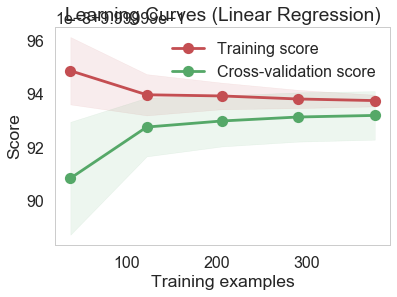

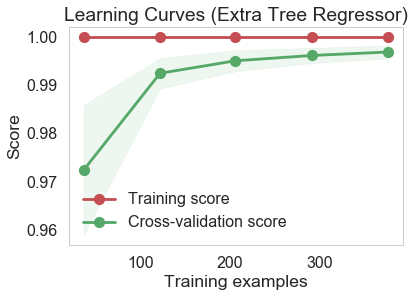

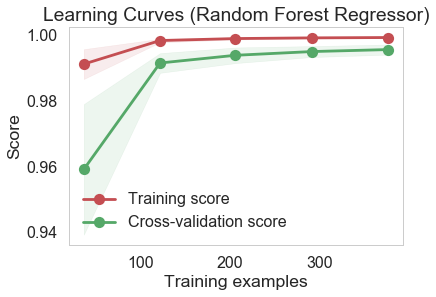

In [655]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                       n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
       estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                    train_scores_mean + train_scores_std, alpha=0.1,
                    color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                    test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
            label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
            label="Cross-validation score")

    plt.legend(loc="best")
    return plt


digits = load_digits()

title = "Learning Curves (Linear Regression)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

title = "Learning Curves (Extra Tree Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = ExtraTreesRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)


title = "Learning Curves (Random Forest Regressor)"
# Cross validation with 100 iterations to get smoother mean test and train
# score curves, each time with 20% data randomly selected as a validation set.
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

#### From the above graphs it is observed that none of the model were overfitted

## Conclusion

- After executing all the Regression models the best model was Linear Regression as it had the highest R2 value which was 0.99
- After performing Cross-validation the best accuracy was observed for Linear Regression which is 0.99
- After plotting the Bias-Variance graph it is observed that Random Forest Regressor has the highest score 
#### As per the above observations it can be concluded that Linear Regression is the best fit model to determine tha Happiness Score of a Country

### Clustering Algorithms


### References:

[1]https://www.kaggle.com/mshinde10/predicting-world-happiness                                                                   
[2]http://danielhomola.com/2015/05/08/borutapy-an-all-relevant-feature-selection-method/                                         
[3]https://automl.info/tpot/                                                                                                     
[4]http://enhancedatascience.com/2017/07/04/machine-learning-explained-regularization/                                           
[5]http://blog.minitab.com/blog/adventures-in-statistics-2/regression-analysis-how-do-i-interpret-r-squared-and-assess-the-goodness-of-fit                                                                                                                 
[6]https://en.wikipedia.org/wiki/Root-mean-square_deviation                                                                     
[7]https://en.wikipedia.org/wiki/Mean_absolute_percentage_error                                                                 
[8]http://scott.fortmann-roe.com/docs/BiasVariance